In [10]:
import json

with open('sentence-level-certainty.jsonl', 'r') as file:
    lines = file.readlines()
    print(f'The file has {len(lines)} rows.')

The file has 1551 rows.


In [11]:
epistemic_verbs = {
    "High Modal Strength": ["bet", "expect", "hope", "know", "mean", "predict", "see", "trust"],
    "Medium Modal Strength": ["assume", "believe", "feel", "find", "guess", "imagine", "presuppose", "presume", "reckon", "suppose", "think", "seem", "appear", "gather", "hypothesize", "take", "understand"],
    "Low Modal Strength": ["doubt", "suspect", "wonder"]
}

epistemic_adjectives = {
    "High Modal Strength": ["sure", "positive"],
    "Medium Modal Strength": ["likely", "probable"],
    "Low Modal Strength": ["doubtful", "possible", "uncertain", "unclear", "unconvinced", "unsure", "unlikely", "improbable"]
}

epistemic_nouns = {
    "High Modal Strength": ["assertion", "belief", "conviction", "fact", "knowledge"],
    "Medium Modal Strength": ["Assumption", "chance", "claim", "hypothesis", "idea", "impression", "feeling", "opinion", "possibility", "suggestion"],
    "Low Modal Strength": ["Doubt"]
}

epistemic_adverbs = {
    "High Modal Strength": ["actually", "assuredly", "certainly", "clearly", "definitely", "indubitably", "ineluctably", "inescapably", "manifestly", "obviously", "really", "surely", "truly", "unarguably", "unavoidably", "undeniably", "undoubtedly", "unquestionably"],
    "Medium Modal Strength": ["apparently", "kind of", "predictably", "probably", "sort of", "supposedly", "allegedly", "reportedly", "evidently"],
    "Low Modal Strength": ["perhaps", "possibly", "conceivably"]
}

### Paper 1, Model 1: Naive Nizhnik

In [12]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error

data = []
with open('sentence-level-certainty.jsonl', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
epistemic_words = epistemic_verbs["High Modal Strength"] + epistemic_verbs["Medium Modal Strength"] + epistemic_verbs["Low Modal Strength"] + \
                  epistemic_adjectives["High Modal Strength"] + epistemic_adjectives["Medium Modal Strength"] + epistemic_adjectives["Low Modal Strength"] + \
                  epistemic_nouns["High Modal Strength"] + epistemic_nouns["Medium Modal Strength"] + epistemic_nouns["Low Modal Strength"] + \
                  epistemic_adverbs["High Modal Strength"] + epistemic_adverbs["Medium Modal Strength"] + epistemic_adverbs["Low Modal Strength"]

vectorizer = CountVectorizer(vocabulary=epistemic_words)
X = vectorizer.fit_transform(df['finding']).toarray()
y = df['sentence-level-certainty'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.809557641200648e+24


C:\Users\12406\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:1375: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


### Paper 1, Model 2: Random Forest Nizhnik

In [13]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = []
with open('sentence-level-certainty.jsonl', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# Using TF-IDF Vectorizer instead of CountVectorizer
vectorizer = TfidfVectorizer(vocabulary=epistemic_words, lowercase=True, stop_words='english')
X = vectorizer.fit_transform(df['finding']).toarray()

# Normalizing the target variable
y = df['sentence-level-certainty'].values.reshape(-1, 1)
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Using a more complex model: RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())  # .ravel() to convert y_train to a 1D array
y_pred = model.predict(X_test)

# Calculate MSE on the original scale of y
y_test_original = scaler.inverse_transform(y_test)
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

C:\Users\12406\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:1375: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Mean Squared Error: 1.012815563389228


### Paper 1, Model 3: Hyperparameter-Tuned Random Forest Nizhnik

In [14]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import make_scorer, mean_squared_error
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # Define a pipeline combining a text feature extractor with a simple classifier
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(lowercase=True, stop_words='english')),
#     ('scaler', StandardScaler(with_mean=False)),  # Use with_mean=False for sparse data
#     ('clf', RandomForestRegressor(random_state=42))
# ])

# # Define the parameter grid to search
# param_grid = {
#     'clf__n_estimators': [100, 200],
#     'clf__max_depth': [None, 10, 20],
#     # Add more parameters here
# }

# # Define your search
# search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# X = df['finding']
# y = df['sentence-level-certainty'].values

# search.fit(X, y)

# print(f"Best parameters: {search.best_params_}")
# print(f"Best MSE: {-search.best_score_}")

### Paper 1, Model 4: Bucketed Nizhnik

In [15]:

import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load data
data = []
with open('sentence-level-certainty.jsonl', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# Prepare a custom tokenizer that classifies words based on their epistemic strength and part of speech
def epistemic_tokenizer(sentence):
    tokens = []
    for word in sentence.split():
        word_lower = word.lower()
        for strength, words_list in epistemic_verbs.items():
            if word_lower in words_list:
                tokens.append(f"verb_{strength}")
        for strength, words_list in epistemic_adjectives.items():
            if word_lower in words_list:
                tokens.append(f"adjective_{strength}")
        for strength, words_list in epistemic_nouns.items():
            if word_lower in words_list:
                tokens.append(f"noun_{strength}")
        for strength, words_list in epistemic_adverbs.items():
            if word_lower in words_list:
                tokens.append(f"adverb_{strength}")
    return tokens

# Using TF-IDF Vectorizer with a custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=epistemic_tokenizer, lowercase=True, stop_words='english')
X = vectorizer.fit_transform(df['finding']).toarray()

# Normalizing the target variable
y = df['sentence-level-certainty'].values.reshape(-1, 1)
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())

# Predictions and evaluation
y_pred = model.predict(X_test)
y_test_original = scaler.inverse_transform(y_test)
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.989091937273428


C:\Users\12406\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\12406\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adverb_Low Modal Strength', 'verb_High Modal Strength', 'verb_Medium Modal Strength'] not in stop_words.
  warnings.warn(


### Paper 2: Pei Model

In [16]:
# from certainty_estimator.predict_certainty import CertaintyEstimator
# from tqdm import tqdm
# from sklearn.metrics import mean_absolute_error

# findings = [item['finding'] for item in data]
# sentence_estimator = CertaintyEstimator(task='sentence-level', use_auth_token=False)
# certainty_predictions = sentence_estimator.predict(findings, tqdm=tqdm)
# true_certainty_levels = df['sentence-level-certainty'].tolist()
# mae = mean_absolute_error(true_certainty_levels, certainty_predictions)
# print(f"Mean Absolute Error: {mae}")

### Baseline: GPT-4 Prompting

In [23]:
import json
import openai
from dotenv import load_dotenv
import os
from sklearn.metrics import mean_absolute_error
import re
from sklearn.preprocessing import QuantileTransformer
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

# Load API key from .env file
load_dotenv('key.env')
api_key = os.getenv('API_KEY')
openai.api_key = api_key

# Load the dataset
data_path = 'sentence-level-certainty.jsonl'
entries = []
with open(data_path, 'r') as file:
    entries = [json.loads(line) for line in file]

def get_numeric_prediction(text):
    """Extracts the first found float value from the given text and clamps it to the range 0.0 to 5.0."""
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", text)
    if matches:
        value = float(matches[0])
        # Clamp the value to be within 0.0 to 5.0
        return max(0.0, min(5.0, value))
    else:
        return None

def get_gpt_prediction(model, prompt_template, include_examples, finding):
    examples = ""
    if include_examples:
        examples = (
            'Given the finding: "Kids get more exercise when the sun is out later in the evening.", predict a certainty score between 0.0 and 5.0: 5.0\n'
            'Given the finding: "Screening appeared to reduce prostate cancer deaths by 15% at 9 years, and this improved to 22% at 11 years.", predict a certainty score between 0.0 and 5.0: 4.0\n'
            'Given the finding: "The results indicate that organizations may benefit from encouraging employees to consider creative activities in their efforts to recover from work.", predict a certainty score between 0.0 and 5.0: 3.0\n'
        )
    prompt = examples + prompt_template.format(finding=finding['finding'])
    try:
        response = openai.ChatCompletion.create(
            model=model,
            messages=[
                {"role": "system", "content": "You are a helpful assistant trained to predict certainty scores for medical findings on a scale from 0.0 to 5.0."},
                {"role": "user", "content": prompt}
            ]
        )
        predicted_text = response.choices[0].message['content'].strip()
        predicted_score = get_numeric_prediction(predicted_text)
    except Exception as e:
        print(f"Error in processing prediction: {e}")
        predicted_score = None
    return predicted_score, finding['sentence-level-certainty']

def evaluate_model(model, prompt_template, entries, include_examples=False):
    results = []
    task_count = 0
    with ThreadPoolExecutor(max_workers=1551) as executor:
        future_to_prediction = {executor.submit(get_gpt_prediction, model, prompt_template, include_examples, entry): entry for entry in entries}
        for future in as_completed(future_to_prediction):
            result = future.result()
            task_count += 1
            # print(f"Completed tasks: {task_count}/{len(entries)}")
            if result[0] is not None:
                results.append(result)
    
    predicted_scores = [result[0] for result in results if result[0] is not None]
    true_scores = [result[1] for result in results]
    print(len(predicted_scores), len(true_scores))
    print(predicted_scores)
    print(true_scores)
    mae = mean_absolute_error(true_scores, predicted_scores)
    print(mae)

    from sklearn.isotonic import IsotonicRegression

    # Apply isotonic regression to calibrate the predicted scores
    isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
    isotonic_regressor.fit(predicted_scores, true_scores)
    predicted_scores_calibrated = isotonic_regressor.predict(predicted_scores)
    print(len(predicted_scores_calibrated), len(true_scores))
    print(predicted_scores_calibrated)
    print(true_scores)
    mae_calibrated = mean_absolute_error(true_scores, predicted_scores_calibrated)
    print(mae_calibrated)

    # Calculate MAE after quantile transformation
    # if len(predicted_scores_transformed) > 0:
    #     mae = mean_absolute_error(true_scores, predicted_scores_transformed)
    #     print(f"Model: {model}, Mean Absolute Error after Quantile Transformation: {mae}", flush=True)
    # else:
    #     print("No successful predictions were made.", flush=True)

# Function calls
evaluate_model("gpt-3.5-turbo", "Given the finding: \"{finding}\", predict a certainty score between 0.0 and 5.0:", entries, include_examples=False)
# evaluate_model("gpt-3.5-turbo", "Given the finding: \"{finding}\", predict a certainty score between 0.0 and 5.0. Here are a few examples:\n", entries, include_examples=True)
# evaluate_model("gpt-4-0125-preview", "Given the finding: \"{finding}\", predict a certainty score between 0.0 and 5.0:", entries, include_examples=False)


Error in processing prediction: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)
Error in processing prediction: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)
Error in processing prediction: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)
1461 1461
[4.5, 3.5, 3.8, 2.5, 4.3, 3.5, 4.5, 3.5, 4.2, 4.5, 1.5, 4.2, 4.2, 4.2, 4.5, 4.0, 2.8, 2.5, 4.5, 2.5, 4.0, 4.6, 2.8, 4.2, 3.5, 4.2, 4.2, 4.2, 2.5, 4.8, 2.5, 2.5, 4.3, 4.5, 4.5, 4.2, 4.5, 2.5, 4.0, 3.8, 3.5, 4.0, 4.5, 3.5, 4.5, 3.5, 3.5, 4.2, 4.5, 3.5, 4.2, 3.8, 4.5, 3.5, 4.5, 4.2, 2.5, 3.5, 4.2, 3.5, 4.2, 4.2, 4.2, 4.5, 4.5, 3.5, 2.5, 3.5, 3.2, 4.5, 3.5, 2.5, 4.0, 3.8, 2.5, 2.5, 2.5, 4.0, 4.2, 0.8, 4.5, 4.5, 4.2, 3.5, 2.5, 4.2, 4.5, 2.5, 4.5, 3.5, 0.5, 4.2, 1.2, 4.2, 2.5, 4.2, 4.2, 4.0, 2.5, 3.5, 4.3, 2.5, 1.5, 3.5, 2.5, 3.5, 3.5, 2.5, 4.5, 1.5, 4.2, 1.5, 4.5, 3.5,

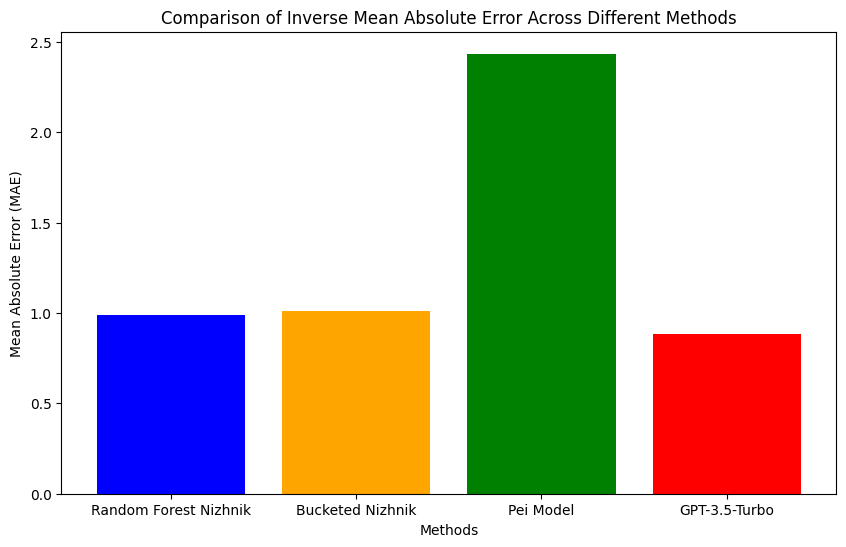

In [18]:
import matplotlib.pyplot as plt

# Hardcoded MAE values from different methods
methods = ['Random Forest Nizhnik', 'Bucketed Nizhnik', 'Pei Model', 'GPT-3.5-Turbo']
mae_values = [1/1.012815563389228, 1/0.989091937273428, 1/0.4108365239467822, 1/1.1300000000000001]  # Example MAE values

plt.figure(figsize=(10, 6))
plt.bar(methods, mae_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Methods')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Inverse Mean Absolute Error Across Different Methods')
plt.show()
